In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_csv('./data/2001-2023.csv', encoding='euc-kr')

In [2]:
df = df[['일시', '평균 수온(°C)']]
df['일시'] = pd.to_datetime(df['일시'])

# df.set_index('일시',inplace=True)

df.tail()

,일시,평균 수온(°C)
7303,2023-12-29,13.9
7304,2023-12-30,14.3
7305,2023-12-31,NaN
7306,2024-01-01,NaN
7307,2024-01-02,12.9


# Data Pre-processing
### Processing missing values

1. 결측치 존재하는 행을 삭제하고 진행
2. 결측치 채우고 진행
    1. 해당하는 달에 당월 평균값으로 채운다. ex) 2001-01-28 null값이 존재한다. 2001-01월에 수온평균 구한다음 채워넣는다. --> 테이블 형식의 정형 데이터이면 그렇게 하는게 낫다. 시계열이면 다른 방법 추천
    2. 앞뒤 값을 참고하여 채워 넣는다.
    3. 여러날이 빠져있어도 앞뒤로 회귀평균을 넣는다. 앞뒤를 직선을 그어서 회귀값으로 채워넣는다.
    4. 일시가 비어있으면 즉, 행 자체가 없는 날짜를 통째로 생성함 => 3번과 동일한 방식으로 결측치 채우기\

=> 2-3. 방식으로 결측치 채우기로 채택

In [3]:
# c = (df['일시'].dt.year == 2001)
# df.drop(df[c].index, inplace=True)
df = df.drop(range(7260,7308))

c2 = (df['일시'].dt.year >= 2001) & (df['일시'].dt.year <= 2018)
df.drop(df[c2].index, inplace=True)
# df.drop(7259, inplace=True)
df.drop(range(7257,7260), inplace=True)
df.head()

,일시,평균 수온(°C)
5465,2019-01-01,14.4
5466,2019-01-02,14.8
5467,2019-01-03,15.1
5468,2019-01-04,15.2
5469,2019-01-05,15.2


In [4]:
df.tail()

,일시,평균 수온(°C)
7252,2023-12-27,15.5
7253,2023-12-28,15.2
7254,2023-12-29,15.3
7255,2023-12-30,14.4
7256,2023-12-31,14.3


In [5]:
df.isnull().sum()

일시            0
평균 수온(°C)    18
dtype: int64

In [6]:
df2= df[df.duplicated(subset=['일시'])]
print(df2)

Empty DataFrame
Columns: [일시, 평균 수온(°C)]
Index: []


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 5465 to 7256
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   일시         1792 non-null   datetime64[ns]
 1   평균 수온(°C)  1774 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.1 KB


1. 앞뒤 점 보기
2. 앞뒤 점 선으로 직선긋기
3. 선

In [8]:
df.interpolate(method='linear', inplace=True, limit_direction='both', limit_area='inside')
pd.set_option('display.float_format', '{:.1f}'.format)

In [9]:
df.head()

,일시,평균 수온(°C)
5465,2019-01-01,14.4
5466,2019-01-02,14.8
5467,2019-01-03,15.1
5468,2019-01-04,15.2
5469,2019-01-05,15.2


In [10]:
print(df.loc[5750:5770])

             일시  평균 수온(°C)
5750 2019-10-13       22.2
5751 2019-10-14       22.3
5752 2019-10-15       22.3
5753 2019-10-16       23.0
5754 2019-10-17       22.8
5755 2019-10-18       22.7
5756 2019-10-19       22.4
5757 2019-10-20       22.6
5758 2019-10-21       22.4
5759 2019-10-22       22.3
5760 2019-10-23       22.1
5761 2019-10-24       21.4
5762 2019-10-25       21.0
5763 2019-10-26       21.5
5764 2019-10-27       21.5
5765 2019-10-28       20.9
5766 2019-10-29       20.8
5767 2019-10-30       20.8
5768 2019-10-31       21.2
5769 2019-11-01       22.0
5770 2019-11-02       22.3


In [11]:
df.to_csv('./data/result.csv', index=False)

In [12]:
d = df.isna()
dsd = df[d.any(axis=1)]
pd.set_option('display.max_rows', None) 
print(dsd)

Empty DataFrame
Columns: [일시, 평균 수온(°C)]
Index: []


# EDA 시각화
1. 각 년도별 수온 그래프
2. 전체 기간 수온그래프
3. ACF
4. PACF
5. SCALE하고 그래프 그리기

/home/estsoft/miniconda3/envs/tw/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/tw/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/tw/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/tw/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/tw/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYE

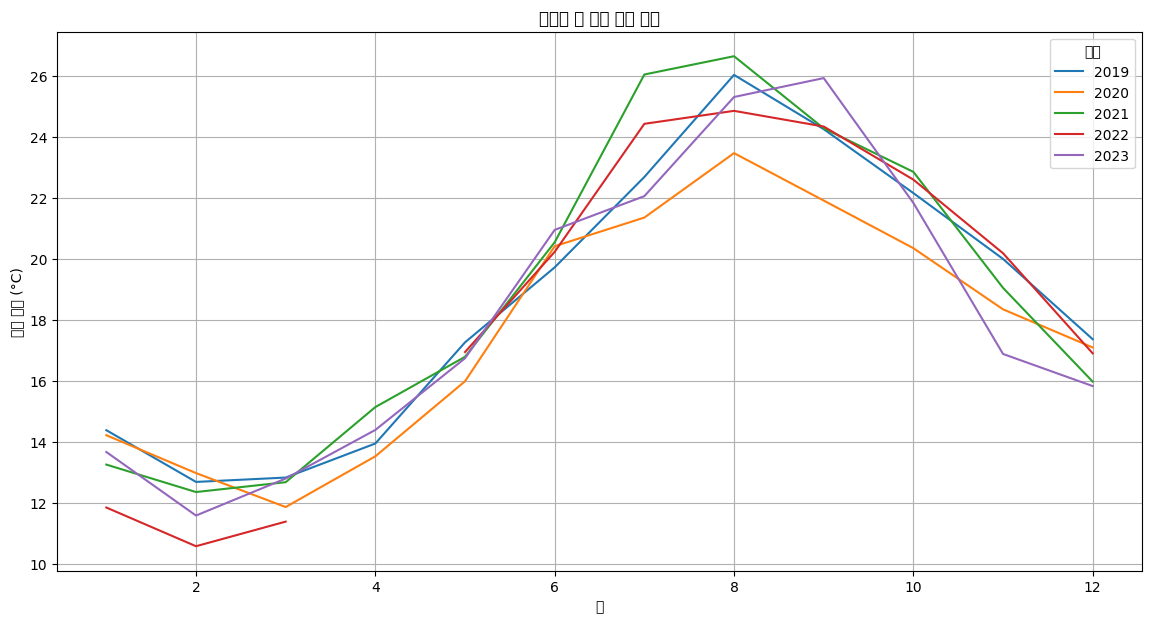

In [13]:
# Set the date as the index
df.set_index('일시', inplace=True)

# Prepare the plot
plt.figure(figsize=(14, 7))

# Extracting unique years from the data
years = df.index.year.unique()

# Plotting each year's data
for year in years:
    # Select the data for the year
    yearly_data = df[df.index.year == year]
    # Calculate the monthly average temperature
    monthly_avg = yearly_data.resample('M').mean()
    # Plot the data
    plt.plot(monthly_avg.index.month, monthly_avg['평균 수온(°C)'], label=str(year))

# Add plot title and labels
plt.title('년도별 월 평균 수온 변화')
plt.xlabel('월')
plt.ylabel('평균 수온 (°C)')
plt.legend(title='년도')
plt.grid(True)

# Show the plot
plt.show()

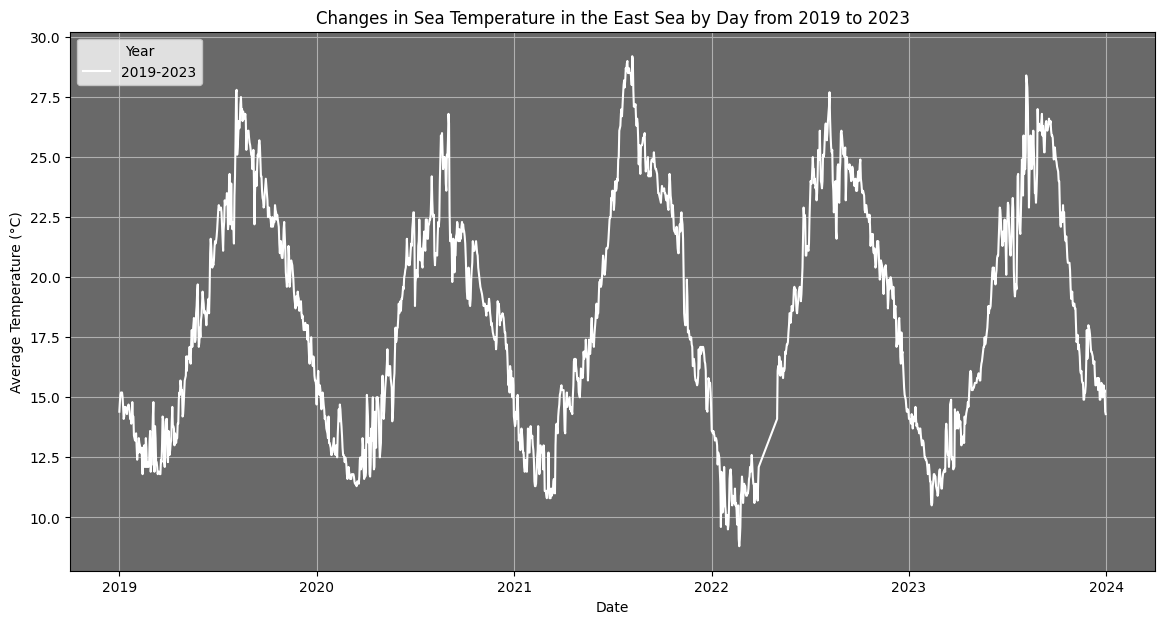

In [14]:
# Prepare the plot
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot()
ax.patch.set_facecolor('dimgray')

# Plot the data
plt.plot(df.index, df['평균 수온(°C)'], color='white', label='2019-2023')

# Add plot title and labels
plt.title('Changes in Sea Temperature in the East Sea by Day from 2019 to 2023')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Year')
plt.grid(True)

# Show the plot
plt.show()